In [1]:
import pandas as pd,numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/Users/suriyag/Downloads/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

In [4]:
df.shape

(181691, 135)

In [5]:
#Missing values
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))
missing(df)

gsubname3           99.99
weaptype4           99.96
weaptype4_txt       99.96
weapsubtype4        99.96
weapsubtype4_txt    99.96
                    ...  
multiple             0.00
doubtterr            0.00
crit3                0.00
property             0.00
eventid              0.00
Length: 135, dtype: float64


In [6]:
cols = []
for col in df.columns:
    cols.append(col)
print(cols)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

## All these 135 columns will not be used for EDA. Filtering out the useful attributes will be better to analyse

In [7]:
df_final = df[['iyear','imonth','iday','extended','region_txt','provstate','city','vicinity','success','suicide','attacktype1_txt','targtype1_txt','targsubtype1_txt','natlty1_txt','weaptype1_txt','weapsubtype1_txt','dbsource']]

In [8]:
df_final.head()

,iyear,imonth,iday,extended,region_txt,provstate,city,vicinity,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,natlty1_txt,weaptype1_txt,weapsubtype1_txt,dbsource
0,1970,7,2,0,Central America & Caribbean,NaN,Santo Domingo,0,1,0,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,Unknown,NaN,PGIS
1,1970,0,0,0,North America,Federal,Mexico city,0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,Unknown,NaN,PGIS
2,1970,1,0,0,Southeast Asia,Tarlac,Unknown,0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,NaN,PGIS
3,1970,1,0,0,Western Europe,Attica,Athens,0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Explosives,Unknown Explosive Type,PGIS
4,1970,1,0,0,East Asia,Fukouka,Fukouka,0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Incendiary,NaN,PGIS


In [9]:
#Missing values
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))
missing(df_final)

weapsubtype1_txt    11.43
targsubtype1_txt     5.71
natlty1_txt          0.86
city                 0.24
provstate            0.23
iyear                0.00
attacktype1_txt      0.00
weaptype1_txt        0.00
targtype1_txt        0.00
success              0.00
suicide              0.00
imonth               0.00
vicinity             0.00
region_txt           0.00
extended             0.00
iday                 0.00
dbsource             0.00
dtype: float64


# Data Cleaning

In [10]:
df_final.describe()

,iyear,imonth,iday,extended,vicinity,success,suicide
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,0.045346,0.068297,0.889598,0.036507
std,13.259430,3.388303,8.814045,0.208063,0.284553,0.313391,0.187549
min,1970.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,1.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,0.000000,1.000000,0.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000


-> On an average, **3.6%** of terrorism were considered as **suicide** <br>
-> Also **11.1%** of terrorism were failed to attack<br>
-> One of the most noticeable thing is that, only **6%** of terrorism were happened **near buildings**, the rest **94% were at distance**

## Missing Values Treatment <br>
Since all the missing data are categorical, Use mode imputation to remove missing values

In [11]:
df_final['weapsubtype1_txt'].mode()

0    Unknown Explosive Type
Name: weapsubtype1_txt, dtype: object

In [12]:
df_final['weapsubtype1_txt'].fillna("Unknown Explosive Type",inplace=True)

In [13]:
df_final['targsubtype1_txt'].mode()

0    Unnamed Civilian/Unspecified
Name: targsubtype1_txt, dtype: object

In [14]:
df_final['targsubtype1_txt'].fillna("Unnamed Civilian/Unspecified",inplace=True)

In [15]:
df_final['natlty1_txt'].mode()

0    Iraq
Name: natlty1_txt, dtype: object

In [16]:
df_final['natlty1_txt'].fillna("Iraq",inplace=True)

In [17]:
df_final['provstate'].mode()

0    Baghdad
Name: provstate, dtype: object

In [18]:
df_final['provstate'].fillna("Baghdad",inplace=True)

In [19]:
df_final['city'].mode()

0    Unknown
Name: city, dtype: object

In [20]:
df_final['city'].fillna("city",inplace=True)

In [21]:
#Missing values
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))
missing(df_final)

iyear               0.0
suicide             0.0
weapsubtype1_txt    0.0
weaptype1_txt       0.0
natlty1_txt         0.0
targsubtype1_txt    0.0
targtype1_txt       0.0
attacktype1_txt     0.0
success             0.0
imonth              0.0
vicinity            0.0
city                0.0
provstate           0.0
region_txt          0.0
extended            0.0
iday                0.0
dbsource            0.0
dtype: float64


# EDA

## Univariate Analysis

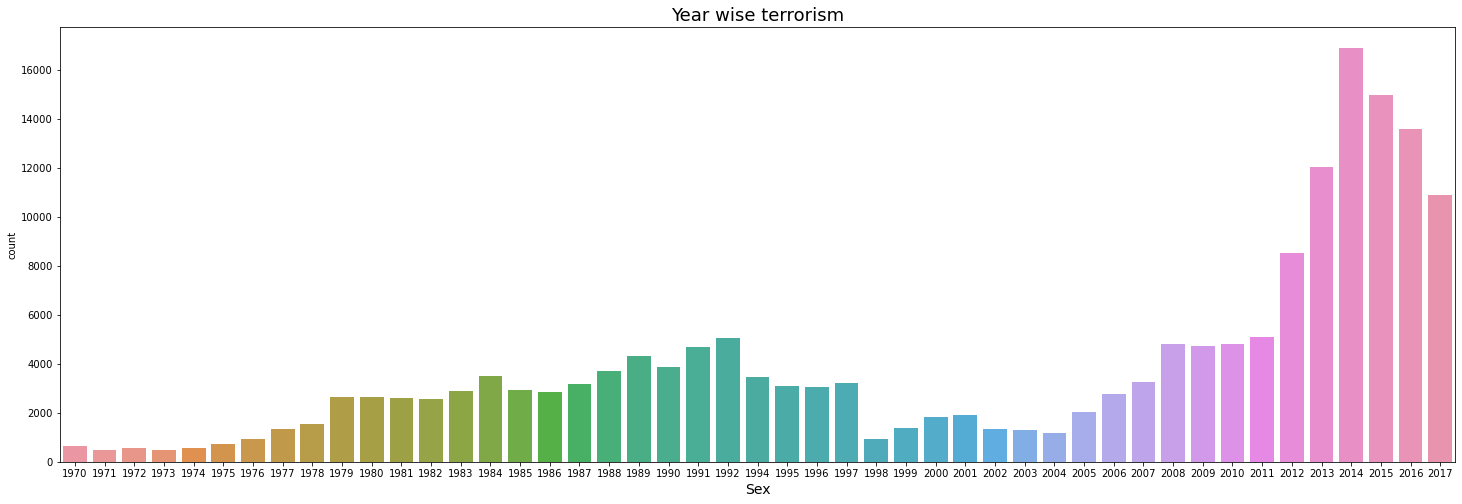

In [22]:
plt.figure(figsize=(25,8))
sns.countplot(x = 'iyear', data = df_final)
plt.title('Year wise terrorism',size=18)
plt.xlabel('Sex',size=14)
plt.show()

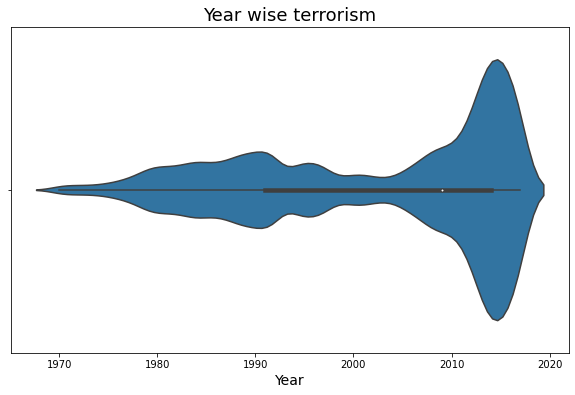

In [23]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df_final['iyear'])
plt.title('Year wise terrorism',size=18)
plt.xlabel('Year',size=14)
plt.show()


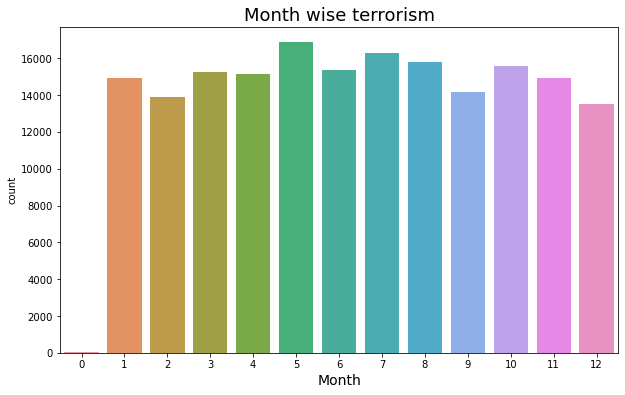

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'imonth', data = df_final)
plt.title('Month wise terrorism',size=18)
plt.xlabel('Month',size=14)
plt.show()

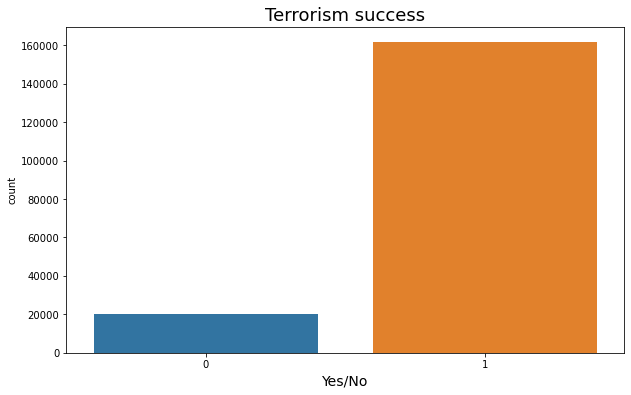

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'success', data = df_final)
plt.title('Terrorism success',size=18)
plt.xlabel('Yes/No',size=14)
plt.show()

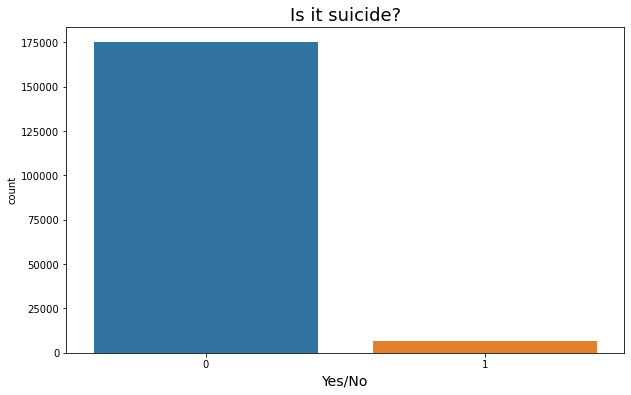

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'suicide', data = df_final)
plt.title('Is it suicide?',size=18)
plt.xlabel('Yes/No',size=14)
plt.show()

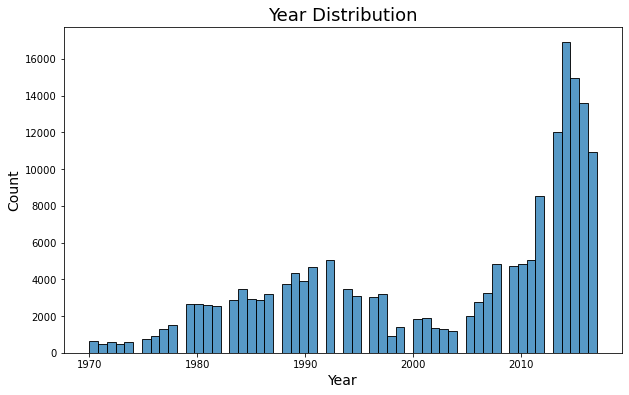

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df_final.iyear)
plt.title('Year Distribution',size=18)
plt.xlabel('Year',size=14)
plt.ylabel('Count',size=14)
plt.show()

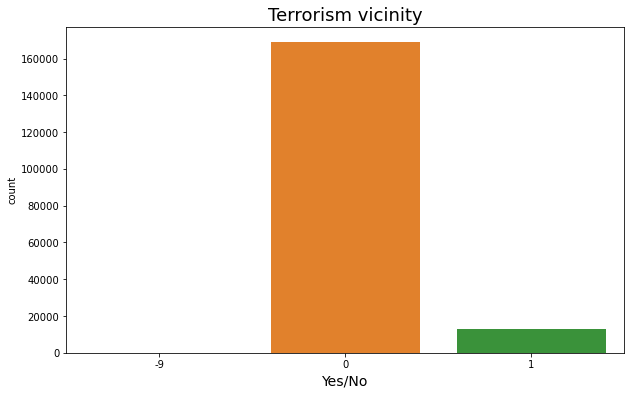

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'vicinity', data = df_final)
plt.title('Terrorism vicinity',size=18)
plt.xlabel('Yes/No',size=14)
plt.show()

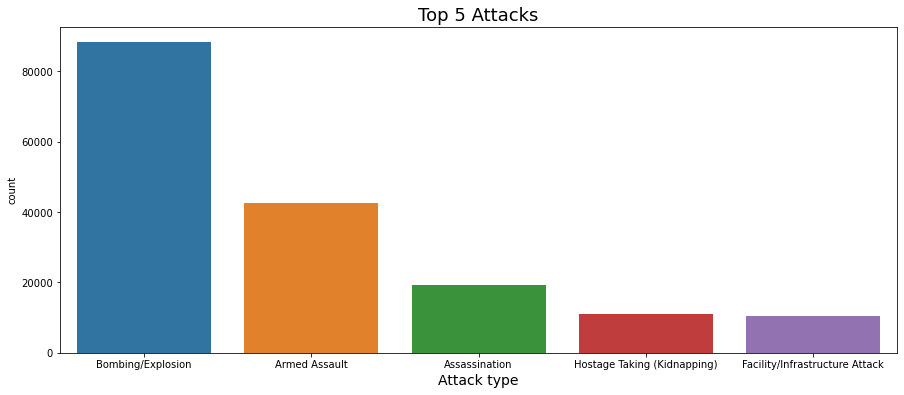

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'attacktype1_txt', data = df_final,order=df_final['attacktype1_txt'].value_counts().iloc[:5].index)
plt.title('Top 5 Attacks',size=18)
plt.xlabel('Attack type',size=14)
plt.show()

# Bombing/Explosing - Detailed Insight

### Bombing is the most used attack. Lets look into the detailed insights of bombs attack

In [30]:
bomb = df_final[df_final['attacktype1_txt'] == 'Bombing/Explosion']

In [31]:
bomb.head()

,iyear,imonth,iday,extended,region_txt,provstate,city,vicinity,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,natlty1_txt,weaptype1_txt,weapsubtype1_txt,dbsource
3,1970,1,0,0,Western Europe,Attica,Athens,0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Explosives,Unknown Explosive Type,PGIS
7,1970,1,2,0,North America,California,Oakland,0,1,0,Bombing/Explosion,Utilities,Electricity,United States,Explosives,Unknown Explosive Type,Hewitt Project
10,1970,1,1,0,North America,Wisconsin,Baraboo,0,0,0,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,United States,Explosives,Unknown Explosive Type,PGIS
15,1970,1,10,0,Eastern Europe,Berlin,Berlin,0,1,0,Bombing/Explosion,Government (General),Unnamed Civilian/Unspecified,Germany,Explosives,Unknown Explosive Type,PGIS
17,1970,1,12,0,North America,New York,New York City,0,1,0,Bombing/Explosion,Educational Institution,School/University/Educational Building,United States,Explosives,Pipe Bomb,Hewitt Project


In [32]:
bomb.shape

(88255, 17)

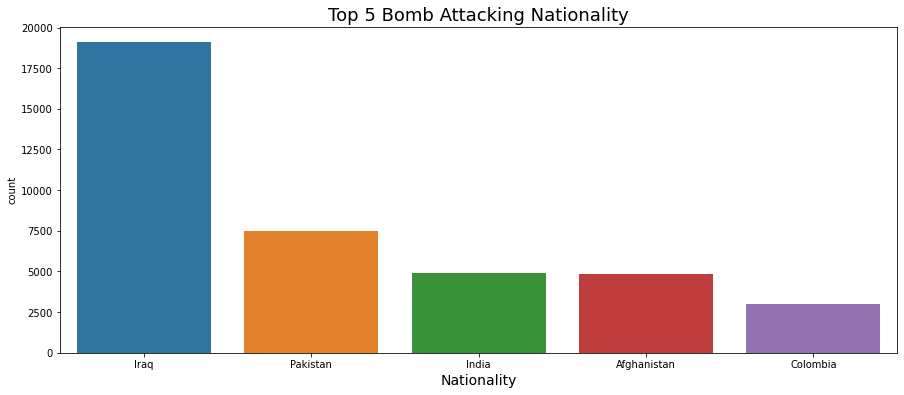

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'natlty1_txt', data = bomb,order=bomb['natlty1_txt'].value_counts().iloc[:5].index)
plt.title('Top 5 Bomb Attacking Nationality',size=18)
plt.xlabel("Nationality",size=14)
plt.show()

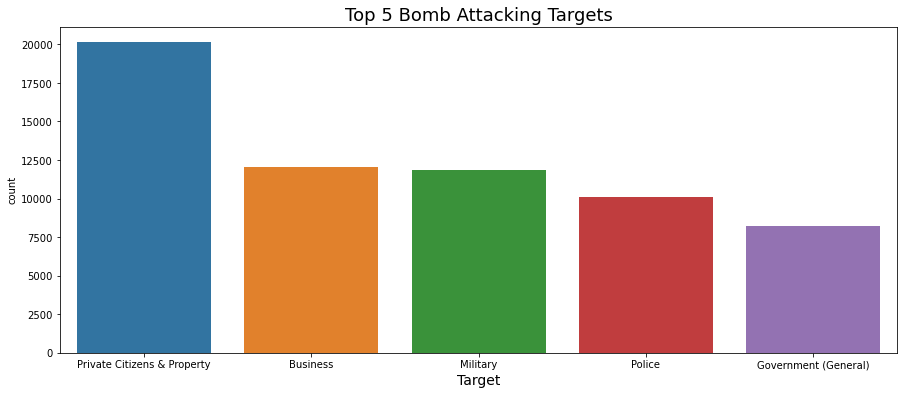

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'targtype1_txt', data = bomb,order=bomb['targtype1_txt'].value_counts().iloc[:5].index)
plt.title('Top 5 Bomb Attacking Targets',size=18)
plt.xlabel("Target",size=14)
plt.show()

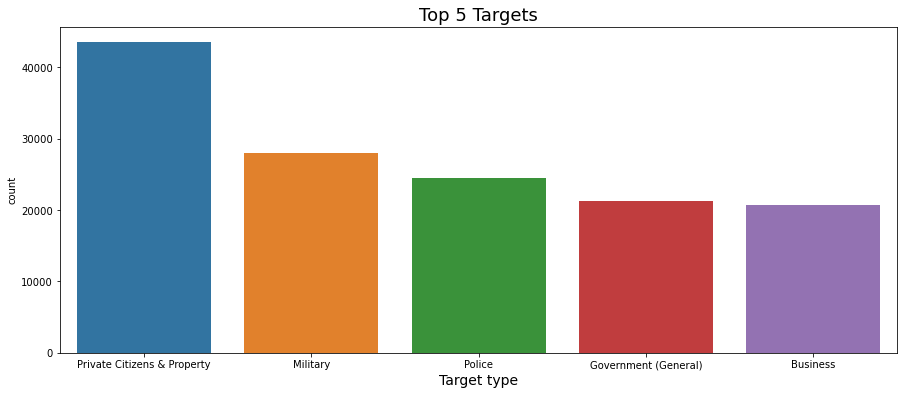

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'targtype1_txt', data = df,order=df['targtype1_txt'].value_counts().iloc[:5].index)
plt.title('Top 5 Targets',size=18)
plt.xlabel('Target type',size=14)
plt.show()

# Conclusion [From Above Insights]:
